In [1]:
import geopandas as gpd
import random
from shapely.geometry import box
import matplotlib.pyplot as plt

# Generate random squares within border region

In [2]:
def generate_random_square(bounds, side_length):
    xmin, ymin, xmax, ymax = bounds
    x = random.uniform(xmin, xmax - side_length)
    y = random.uniform(ymin, ymax - side_length)
    return box(x, y, x + side_length, y + side_length)

In [3]:
def squares_shapefile(file, number, region):
    gdf = gpd.read_file(file)
    gdf = gdf.to_crs(epsg=25831)
    total_bounds = gdf.total_bounds

    # Side length in meters for 1224 meters x 1224 meters square
    side_length = 1224  

    # Generate random squares
    squares = []
    random.seed(0)
    while len(squares) < number:
        random_square = generate_random_square(total_bounds, side_length)
        if gdf.contains(random_square).any():  # Check if the square intersects the shapefile
            squares.append(random_square)

    # Create a GeoDataFrame from the squares
    squares_gdf = gpd.GeoDataFrame(geometry=squares, crs=gdf.crs)

    # Save to a new shapefile
    squares_gdf.set_crs(epsg=25831, inplace=True)
    squares_gdf.to_file(f'../../data/raw/random_squares_shapefiles/random_squares_{region}.shp')

    return squares_gdf

In [4]:
squares_gdf_cat = squares_shapefile("../../data/raw/region_shapefiles/cat/cat.shp", 500, 'cat')
squares_gdf_ar = squares_shapefile("../../data/raw/region_shapefiles/ar/ar.shp", 500, 'ar')

# Visualize

/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_44167/1054103320.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


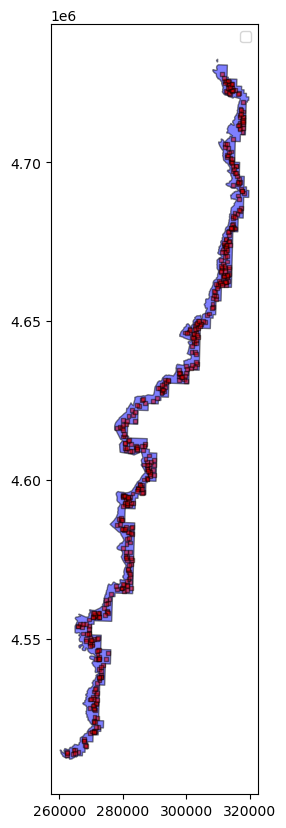

In [5]:
# Load the original shapefile
original_area = gpd.read_file("../../data/raw/region_shapefiles/cat/cat.shp")
original_area = original_area.to_crs(epsg=25831)


# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as necessary

# Set equal aspect ratio
ax.set_aspect('equal')

# Plot the original area
original_area.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='Original Area')

# Plot the squares
squares_gdf_cat.plot(ax=ax, color='red', alpha=0.5, edgecolor='k', label='Random Squares')

# Adding legend
plt.legend()

# Show plot
plt.show()


/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_44167/2239184133.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


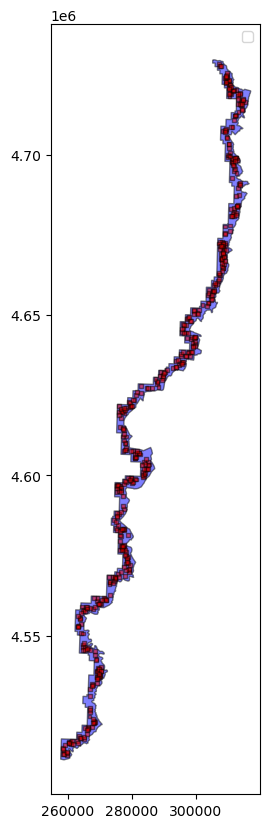

In [6]:
# Load the original shapefile
original_area = gpd.read_file("../../data/raw/region_shapefiles/ar/ar.shp")
original_area = original_area.to_crs(epsg=25831)


# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as necessary

# Set equal aspect ratio
ax.set_aspect('equal')

# Plot the original area
original_area.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='Original Area')

# Plot the squares
squares_gdf_ar.plot(ax=ax, color='red', alpha=0.5, edgecolor='k', label='Random Squares')

# Adding legend
plt.legend()

# Show plot
plt.show()
